<a href="https://colab.research.google.com/github/Inishpy/ML-and-DL-Project-works/blob/main/DeepLearningArtem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,Dense, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize, to_categorical
import numpy as np
import keras

In [ ]:
model = Sequential()
#first hidden layer
model.add(Dense(128, activation="relu", input_shape=(784,)))
#sencond
model.add(Dense(128, activation='relu'))
#third
model.add(Dense(64, activation="relu"))
#output
model.add(Dense(10, activation="softmax"))

In [ ]:
model_ = Sequential([
    Dense(128, input_shape=(784,)),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)
y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
partial_x_train = partial_x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)
partial_x_train = partial_x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
model.fit(partial_x_train, partial_y_train,
          validation_data = (x_val, y_val),
          epochs=3, verbose=2)

Epoch 1/3
1563/1563 - 8s - loss: 0.2825 - accuracy: 0.9157 - val_loss: 0.1505 - val_accuracy: 0.9538 - 8s/epoch - 5ms/step
Epoch 2/3
1563/1563 - 5s - loss: 0.1132 - accuracy: 0.9645 - val_loss: 0.1042 - val_accuracy: 0.9692 - 5s/epoch - 4ms/step
Epoch 3/3
1563/1563 - 8s - loss: 0.0797 - accuracy: 0.9747 - val_loss: 0.1150 - val_accuracy: 0.9662 - 8s/epoch - 5ms/step


In [ ]:
model.save('model1.h5')

In [ ]:
model = keras.models.load_model('model1.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


Functional API


In [ ]:
inputs = Input(shape=(784,))

x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation= 'relu')(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

In [ ]:
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import KFold
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test)=boston_housing.load_data()

In [ ]:
df = pd.DataFrame(x_train)
df.round(2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23,0.0,8.14,0.0,0.54,6.14,91.7,3.98,4.0,307.0,21.0,396.90,18.72
1,0.02,82.5,2.03,0.0,0.42,7.61,15.7,6.27,2.0,348.0,14.7,395.38,3.11
2,4.90,0.0,18.10,0.0,0.63,4.97,100.0,1.33,24.0,666.0,20.2,375.52,3.26
3,0.04,0.0,5.19,0.0,0.52,6.04,34.5,5.99,5.0,224.0,20.2,396.90,8.01
4,3.69,0.0,18.10,0.0,0.71,6.38,88.4,2.57,24.0,666.0,20.2,391.43,14.65


In [ ]:
#each feature is normalized i.e 13 featueres
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

In [ ]:
seed = 0
np.random.seed(seed)

kf = KFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []


init = initializers.glorot_uniform(seed=0)


#loop for cross validation
for train, test in kf.split(x_train, y_train):

  inputs = Input(shape=(13,))
  layer1 = Dense(64, activation='relu', kernel_initializer=init, bias_initializer='Ones')(inputs)
  layer2 = Dense(32, activation='relu', kernel_initializer=init, bias_initializer='Ones')(layer1)
  layer3 = Dense(32, activation='relu', kernel_initializer=init, bias_initializer='Ones')(layer2)
  outputs = Dense(1, kernel_initializer=init, bias_initializer='Ones')(layer3)

  model = Model(inputs, outputs)
  model.compile(loss='mse', optimizer='adam', metrics=['mae'])
  model.fit(x_train, y_train, epochs=200, verbose=0)

  scores = model.evaluate(x_test, y_test, verbose=0)
  print(model.metrics_names[1], np.round(scores[1], decimals=3), "$")
  cvscores.append(scores[1])


print("MAE: ", np.round(np.mean(cvscores), decimals=3), "$" ,";"
,"(","+/-", np.round(np.std(cvscores), decimals=3), "$", ")" )


mae 2.315 $
mae 2.419 $
mae 2.337 $
MAE:  2.357 $ ; ( +/- 0.044 $ )


4/4 [==============================] - 0s 8ms/step


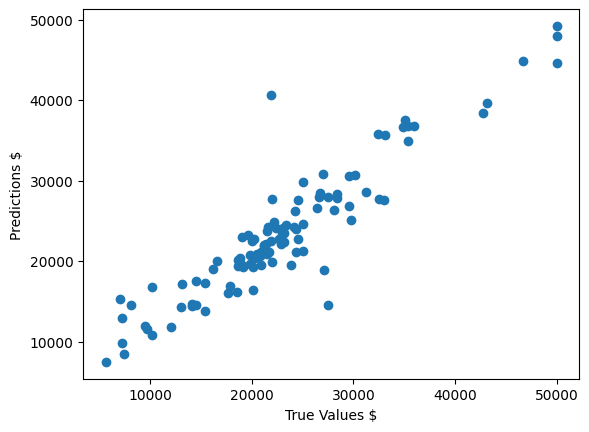

In [ ]:
test_predictions = model.predict(x_test).flatten()
test_predictions = test_predictions * 1000
y_test = y_test * 1000
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values $')
plt.ylabel('Predictions $')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

TypeError: ignored

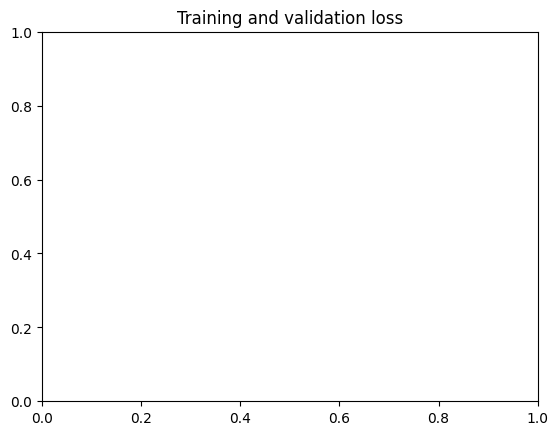

In [ ]:
plt.title('Training and validation loss')
plt.plot(model.history['loss'], label='Training loss')
plt.plot(model.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: ignored

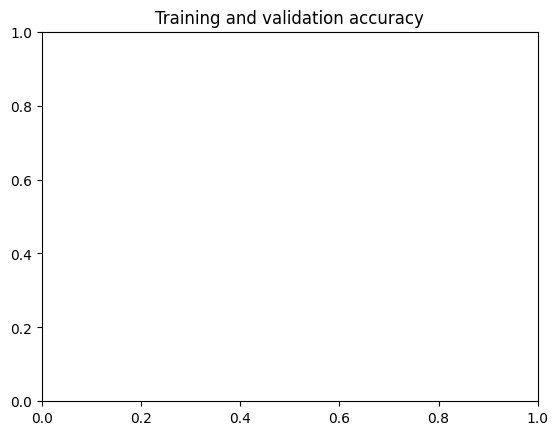

In [ ]:
plt.title('Training and validation accuracy')
plt.plot(model.history['acc'], label='Training accuracy')
plt.plot(model.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils


In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
inputs = Input(shape=(32, 32, 3))
x = BatchNormalization()(inputs)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)

x = BatchNormalization()(inputs)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)

x = BatchNormalization()(inputs)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)

x = BatchNormalization()(inputs)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Dropout(0.25)(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Dropout(0.25)(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Dropout(0.25)(x)
x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

model.summary()




Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                         

In [ ]:
adam = Adam(lr=0.0005)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_acc', patience=3)

model.fit(x_train, y_train, validation_split=0.1,
          shuffle=True, batch_size=32,
          epochs=50, callbacks=[earlystopping])

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/50
1406/1407 [============================>.] - ETA: 0s - loss: 1.6060 - accuracy: 0.4118

1407/1407 [==============================] - 249s 176ms/step - loss: 1.6060 - accuracy: 0.4118 - val_loss: 1.2576 - val_accuracy: 0.5656
Epoch 2/50
1406/1407 [============================>.] - ETA: 0s - loss: 1.2707 - accuracy: 0.5422

1407/1407 [==============================] - 244s 174ms/step - loss: 1.2707 - accuracy: 0.5422 - val_loss: 1.0406 - val_accuracy: 0.6392
Epoch 3/50
1406/1407 [============================>.] - ETA: 0s - loss: 1.1362 - accuracy: 0.5942

1407/1407 [==============================] - 232s 165ms/step - loss: 1.1362 - accuracy: 0.5942 - val_loss: 0.9413 - val_accuracy: 0.6730
Epoch 4/50
1406/1407 [============================>.] - ETA: 0s - loss: 1.0633 - accuracy: 0.6216

1407/1407 [==============================] - 222s 158ms/step - loss: 1.0633 - accuracy: 0.6216 - val_loss: 0.8667 - val_accuracy: 0.6948
Epoch 5/50
1406/1407 [============================>.] - ETA: 0s - loss: 1.0100 - accuracy: 0.6410

1407/1407 [==============================] - 218s 155ms/step - loss: 1.0099 - accuracy: 0.6410 - val_loss: 0.8661 - val_accuracy: 0.7052
Epoch 6/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.9740 - accuracy: 0.6553

1407/1407 [==============================] - 231s 164ms/step - loss: 0.9742 - accuracy: 0.6553 - val_loss: 0.8315 - val_accuracy: 0.7120
Epoch 7/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.9509 - accuracy: 0.6651

1407/1407 [==============================] - 221s 157ms/step - loss: 0.9510 - accuracy: 0.6650 - val_loss: 0.7951 - val_accuracy: 0.7340
Epoch 8/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.9244 - accuracy: 0.6727

1407/1407 [==============================] - 222s 157ms/step - loss: 0.9243 - accuracy: 0.6727 - val_loss: 0.7749 - val_accuracy: 0.7360
Epoch 9/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.9138 - accuracy: 0.6789

1407/1407 [==============================] - 222s 158ms/step - loss: 0.9139 - accuracy: 0.6788 - val_loss: 0.7747 - val_accuracy: 0.7368
Epoch 10/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.8949 - accuracy: 0.6841

1407/1407 [==============================] - 220s 157ms/step - loss: 0.8950 - accuracy: 0.6840 - val_loss: 0.7495 - val_accuracy: 0.7436
Epoch 11/50
1407/1407 [==============================] - ETA: 0s - loss: 0.8828 - accuracy: 0.6889

1407/1407 [==============================] - 220s 157ms/step - loss: 0.8828 - accuracy: 0.6889 - val_loss: 0.7242 - val_accuracy: 0.7516
Epoch 12/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.8683 - accuracy: 0.6926

1407/1407 [==============================] - 219s 155ms/step - loss: 0.8684 - accuracy: 0.6926 - val_loss: 0.7225 - val_accuracy: 0.7500
Epoch 13/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.8522 - accuracy: 0.6983

1407/1407 [==============================] - 221s 157ms/step - loss: 0.8521 - accuracy: 0.6983 - val_loss: 0.7107 - val_accuracy: 0.7524
Epoch 14/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.8393 - accuracy: 0.7049

1407/1407 [==============================] - 221s 157ms/step - loss: 0.8394 - accuracy: 0.7049 - val_loss: 0.7059 - val_accuracy: 0.7528
Epoch 15/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.8298 - accuracy: 0.7085

1407/1407 [==============================] - 219s 156ms/step - loss: 0.8297 - accuracy: 0.7086 - val_loss: 0.6922 - val_accuracy: 0.7624
Epoch 16/50
1406/1407 [============================>.] - ETA: 0s - loss: 0.8268 - accuracy: 0.7100

1407/1407 [==============================] - 215s 153ms/step - loss: 0.8267 - accuracy: 0.7101 - val_loss: 0.6991 - val_accuracy: 0.7586
Epoch 17/50
  25/1407 [..............................] - ETA: 3:09 - loss: 0.7994 - accuracy: 0.7188

In [ ]:
classes = {"0":"Plane", "1":"Car", "2":"Bird", "3":"Cat", "4":"Deer", "5":"Dog", "6" :"Frog",
"7" :"Horse", "8" :"Ship", "9" :"Truck"}


img_path = "military-raptor-582888_640.jpg"
img = image.load_img(img_path, target_size=(32,32))


plt.imshow(img)
plt.show()


x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)


prediction = model.predict(x)
print(prediction)


pr = np.argmax(prediction)
for k,v in classes.items():
  if k == str(pr):
    print("It's a", v)
